# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [ ]:
!unzip pictures.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/pictures/train/COLD/._S9_ASL_COLD9_new_aug_r1.jpg  
  inflating: pictures/train/COLD/S1_ASL_COLD10_new_aug_r1.jpg  
  inflating: __MACOSX/pictures/train/COLD/._S1_ASL_COLD10_new_aug_r1.jpg  
  inflating: pictures/train/COLD/S9_ASL_COLD11_new_aug_r4.jpg  
  inflating: __MACOSX/pictures/train/COLD/._S9_ASL_COLD11_new_aug_r4.jpg  
  inflating: pictures/train/COLD/S1_ASL_COLD10_new_aug_r0.jpg  
  inflating: __MACOSX/pictures/train/COLD/._S1_ASL_COLD10_new_aug_r0.jpg  
  inflating: pictures/train/COLD/S9_ASL_COLD9_new_aug_r0.jpg  
  inflating: __MACOSX/pictures/train/COLD/._S9_ASL_COLD9_new_aug_r0.jpg  
  inflating: pictures/train/COLD/S1_ASL_COLD6_new_aug_r1.jpg  
  inflating: __MACOSX/pictures/train/COLD/._S1_ASL_COLD6_new_aug_r1.jpg  
  inflating: pictures/train/COLD/S9_ASL_COLD1_new_aug_r1.jpg  
  inflating: __MACOSX/pictures/train/COLD/._S9_ASL_COLD1_new_aug_r1.jpg  
  inflating: pictures/train/COLD/S4_ASL_COLD4_n

In [ ]:
import numpy as np
## please add the essential libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [ ]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 64, 64
train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 10
batch_size = 32

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)

# Your Code HERE
train_generator = datagen.flow_from_directory(directory=train_data_dir, 
                                              target_size=(img_width, img_height), 
                                              batch_size=batch_size)
valid_generator = datagen.flow_from_directory(directory=validation_data_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size=batch_size)
test_generator  = datagen.flow_from_directory(directory=test_data_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size=batch_size)


# please print the number of samples in each folder 
print('No. of sampled in train folder', train_generator.samples)
print('No. of sampled in validation folder', valid_generator.samples)
print('No. of sampled in test folder', test_generator.samples)



Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
No. of sampled in train folder 4176
No. of sampled in validation folder 1392
No. of sampled in test folder 1392


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [ ]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
input_shape = (img_height, img_width, 3)

# define the Convolutional Neural Network
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [ ]:
# Compiling the model and training including the files of compile and fit
#Your code 
optim = RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

#Train the model with training and validation set
history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)

Epoch 1/10
131/131 [==============================] - 26s 111ms/step - loss: 0.8349 - accuracy: 0.7217 - val_loss: 0.5106 - val_accuracy: 0.8815
Epoch 2/10
131/131 [==============================] - 14s 108ms/step - loss: 0.1552 - accuracy: 0.9476 - val_loss: 0.4608 - val_accuracy: 0.8829
Epoch 3/10
131/131 [==============================] - 14s 108ms/step - loss: 0.0645 - accuracy: 0.9804 - val_loss: 0.4631 - val_accuracy: 0.9138
Epoch 4/10
131/131 [==============================] - 14s 107ms/step - loss: 0.0366 - accuracy: 0.9895 - val_loss: 0.5450 - val_accuracy: 0.8700
Epoch 5/10
131/131 [==============================] - 14s 107ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.5398 - val_accuracy: 0.9080
Epoch 6/10
131/131 [==============================] - 14s 108ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.6533 - val_accuracy: 0.8930
Epoch 7/10
131/131 [==============================] - 14s 109ms/step - loss: 0.0139 - accuracy: 0.9943 - val_loss: 0.8539 - val_ac

%Test

In [ ]:
# Test the model on a testing dataset
loss, accuracy = model.evaluate(test_generator)
print('Loss without regularizers:', loss)
print('Accuracy without regularizers:', accuracy)

44/44 [==============================] - 3s 79ms/step - loss: 1.3473 - accuracy: 0.8714
Loss without regularizers: 1.3473137617111206
Accuracy without regularizers: 0.8714080452919006


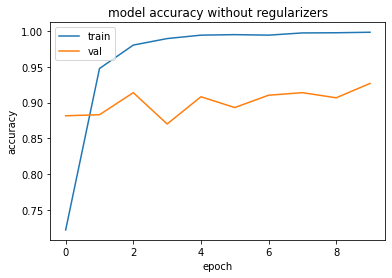

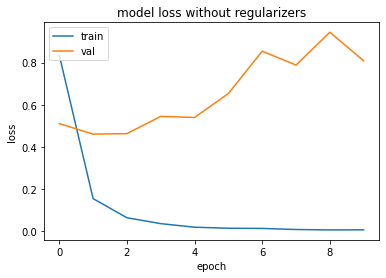

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy without regularizers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss without regularizers')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

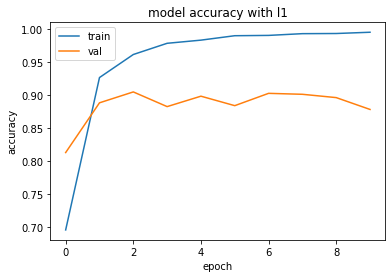

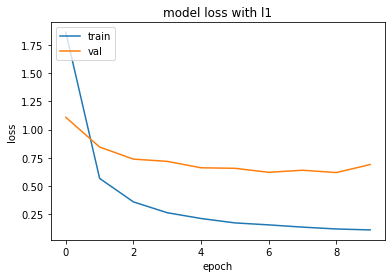

In [ ]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', kernel_regularizer=l1(l=0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(l=0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(l=0.001)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)
loss, accuracy = model.evaluate(test_generator)
print('Loss with l1:', loss)
print('Accuracy with l1:', accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy with l1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with l1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 9216)             

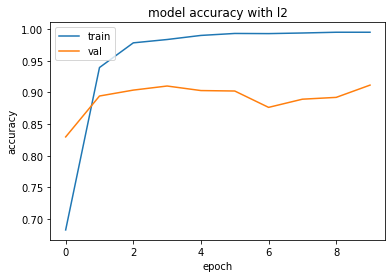

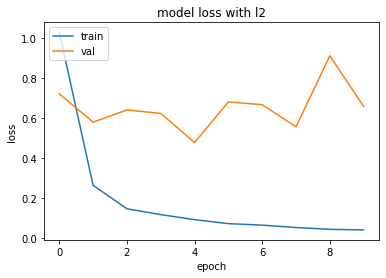

In [ ]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.001)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)
loss, accuracy = model.evaluate(test_generator)
print('Loss with l2:', loss)
print('Accuracy with l2:', accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy with l2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with l2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [ ]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
input_shape = (img_height, img_width, 3)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(directory=train_data_dir, 
                                              target_size=(img_width, img_height), 
                                              batch_size=batch_size)
valid_generator = datagen.flow_from_directory(directory=validation_data_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size=batch_size)
test_generator  = datagen.flow_from_directory(directory=test_data_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size=batch_size)

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.


In [ ]:
# load pre-trained resnet 50 from libarary

resnet = ResNet50(include_top=False,input_shape=input_shape, classes=10)
# Fine-tune the model to fit our project  
# your Code HERE
inputs = Input(shape=input_shape)
x = preprocess_input(inputs)
base = resnet(x)
x = Flatten()(base)
output = Dense(10,activation='softmax')(x)
model = Model(inputs,output)
model.summary()

# define the freeze layers 
# your Code HERE
#resnet.summary()
resnet.get_layer('conv1_conv').trainable=False
resnet.get_layer('conv2_block1_1_conv').trainable=False
resnet.get_layer('conv2_block2_3_conv').trainable=False

# Please compile the new model
optim = Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])


epochs=8
#Train the model with training and validation set
history = model.fit(train_generator, epochs=epochs, validation_data=valid_generator)


94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                1003530

In [ ]:
loss, accuracy = model.evaluate(test_generator)

44/44 [==============================] - 6s 131ms/step - loss: 0.4163 - accuracy: 0.8628


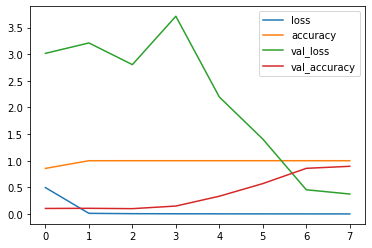

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.yscale('linear')
plt.legend(history.history.keys())
plt.show()